**Importing Libraries and Dataset**


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
X_train.shape
#50000 samples, 32x32 pixwl/img size, channel=3(RGB)

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

*Vizualizing the dataset*

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
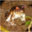

In [ ]:
X_train[0]
#3D array as 3 Channel RGB data

In [ ]:
#Checking data of y
y_train[:5]
#y has class index of the image

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#y is 2D while for function we need 1D array so reshaping
y_train=y_train.reshape(-1,)
y_train[:5]
#We dont want to change /reshape the 1st dim so keeping it as it is by using (-1) ,now flattening the 2nd dim so leave it as blank.

#.reshape(-1,): This method is used to reshape the array.
#-1: This special value tells NumPy to infer the dimension along that axis. In this case,
#it means that NumPy will automatically calculate the number of rows or columns needed to reshape the array into a one-dimensional array.
#,: This comma indicates that we want to reshape the array into a one-dimensional array.



array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
#Giving classes names to its respective index
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
#Plotting Function
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index]) #ploting the index
  plt.xlabel(classes[y[index]]) #with its class name calling via index

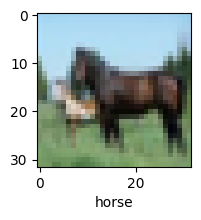

In [ ]:
plot_sample(X_train, y_train, 12)
#now clearly displaying with its class name

**Normalizing image data**

In [ ]:
#for normalization(range 0-1), we have to divide each pixel by 225 for each channel, as image pixel ranges from 0-255
X_train = X_train / 255
X_test = X_test / 255

**Model Building**

*First ANN to see performance then CNN*

In [ ]:
#ANN
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), #1st layer
    	  layers.Dense(3000, activation='relu'), #2 deep layers
    	  layers.Dense(1000, activation='relu'),
    	  layers.Dense(10, activation='sigmoid') #10 classes
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3077 - loss: 1.9309
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4231 - loss: 1.6435
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4519 - loss: 1.5553
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4770 - loss: 1.4897
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4960 - loss: 1.4396


we used loss=sparse_categorical_crossentropy and that's different from categorical_entropy. SCE gives one value i.e index of class while CE gives OHE values as in whole array with 1 at class and 0 on the remaining position?? Use CE when you have convereted all in OHE and SCE when its directly class names etc

In [ ]:
#Eval
ann.evaluate(X_test, y_test)
#accuracy is quite low

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4888 - loss: 1.4429


[1.4519597291946411, 0.4814999997615814]

In [ ]:
#classification report of ann wrt to classes
from sklearn.metrics import classification_report, confusion_matrix
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.53      0.54      1000
           1       0.72      0.40      0.52      1000
           2       0.37      0.34      0.35      1000
           3       0.39      0.25      0.30      1000
           4       0.42      0.42      0.42      1000
           5       0.41      0.39      0.40      1000
           6       0.41      0.71      0.52      1000
           7       0.68      0.41      0.51      1000
           8       0.53      0.72      0.61      1000
           9       0.49      0.66      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



ANN is doing very bad on this dataset

In [ ]:
#CNN - Layers : Convo+Relu - Pooling -...[Feature extraction till here]- Flatten - NN {Classification here}
#CNN figures out the type of filter for feature mapping itself just need to tell size and num of filters
cnn = models.Sequential([
        #cnn layers on top
        layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)), #1 convolutional layer
        layers.MaxPooling2D((2,2)), #1 max pooling layer of size 2 by 2
        layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"), #2 convolutional layer with filter num increased
        layers.MaxPooling2D((2,2)),
        #then same nn layers
        layers.Flatten(), #no need for input shape here as cnn will do it
    	  layers.Dense(64, activation='relu'), #same here, only one dense layer with less neurons is enough
    	  layers.Dense(10, activation='softmax') #softmax normalizes the probabilitiesbtw 0 and 1 by adding some bias , sigmoid doesnt do that
])
#figure out number od cnn layers best for your model by trial and error



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3847 - loss: 1.6888
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6082 - loss: 1.1227
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6645 - loss: 0.9657
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6931 - loss: 0.8867
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7159 - loss: 0.8093
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7391 - loss: 0.7450
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7588 - loss: 0.6952
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7710 - loss: 0.6605
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7869 - loss: 0.6069
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8054 - loss: 0.5585


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6967 - loss: 0.9242


[0.9294840693473816, 0.6976000070571899]

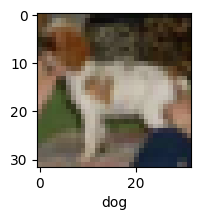

In [ ]:
y_test=y_test.reshape(-1,)
plot_sample(X_test, y_test, 12)

In [ ]:
#making predictions
y_pred = cnn.predict(X_test)
y_pred[12]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.0390497e-05, 6.4984874e-06, 9.7490706e-02, 5.1049314e-02,
       1.3058902e-01, 6.7582005e-01, 3.5377692e-02, 9.6200714e-03,
       2.6172627e-05, 6.7575961e-08], dtype=float32)

As output we got probabilities of all classes, noe need to see which one has the higest and if its correct or not.

In [ ]:
#using argmax for getting highest prob and coverting it in to y classes for better answer
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[12]]
#correct predection

'dog'

In [ ]:
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

1 wrong prediction


In [ ]:
#classification report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.78      0.85      0.81      1000
           2       0.61      0.55      0.57      1000
           3       0.54      0.46      0.50      1000
           4       0.71      0.61      0.65      1000
           5       0.55      0.67      0.60      1000
           6       0.70      0.81      0.76      1000
           7       0.74      0.75      0.74      1000
           8       0.83      0.78      0.80      1000
           9       0.83      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
cnn.save("cnn_model.h5")